## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
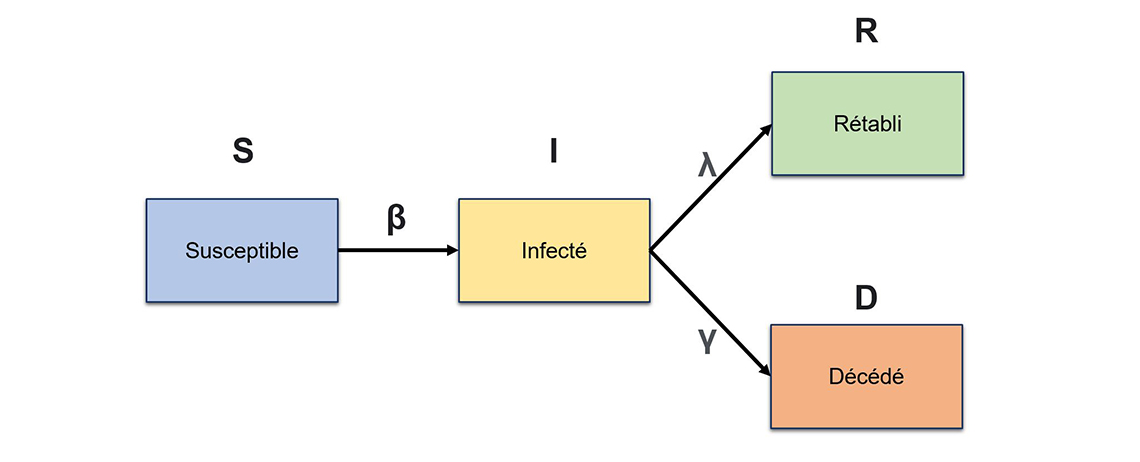


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

#0 : discretisation des equations

- $ S[i+1] = -S[i](\beta \cdot step \cdot I[i] - 1)$
- $ I[i+1] = I[i] \cdot [ step (\beta \cdot S[i] - \gamma - \mu) + 1]$
- $ R[i+1] = \gamma \cdot I[i] \cdot step + R[i] $
- $ D[i+1] = \mu \cdot I[i] \cdot step + D[i] $


In [1]:
# 1 FONCTION PYTHON

import numpy as np 

def method_euler(beta, gamma, mu, step, nb_jours, S0, I0, R0, D0):
	nb_iterations = int(nb_jours/step)
	susceptibles = [S0]
	infectes = [I0]
	retablies = [R0]
	decedes = [D0]

	for i  in range(0, nb_iterations):
		susceptibles.append(- susceptibles[i]*(beta*step*infectes[i] - 1))
		infectes.append(infectes[i]*(step * (beta*susceptibles[i] - gamma - mu) + 1))
		retablies.append(gamma * infectes[i] * step + retablies[i])
		decedes.append(mu * infectes[i] * step + decedes[i])

	susceptibles = np.array(susceptibles) 
	infectes = np.array(infectes)
	retablies = np.array(retablies) 
	decedes = np.array(decedes) 


	susceptibles = susceptibles[::int(1/step)] # step de slicing 
	infectes = infectes[::int(1/step)] 
	retablies = retablies[::int(1/step)] 
	decedes = decedes[::int(1/step)] 
		

	
	return susceptibles, infectes, retablies, decedes

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [2]:
#1
susceptibles, infectes, retablies, decedes = method_euler(beta=0.5, gamma=0.15, mu=0.015, step=0.01, nb_jours=90, S0=0.99, I0=0.01, R0=0, D0=0)
susceptibles.shape

(91,)

<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\e'
C:\Users\sandr\AppData\Local\Temp\ipykernel_17796\1563919367.py:24: SyntaxWarning: invalid escape sequence '\e'
  plt.title("Modèle SIDR avec Méthode d'\euler")


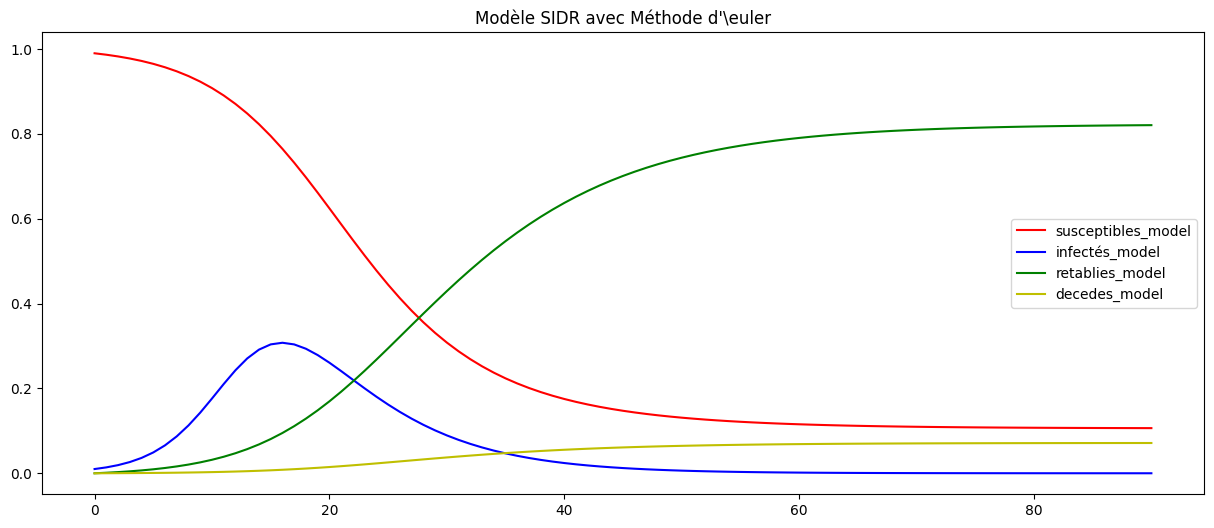

In [15]:
#2
import matplotlib.pyplot as plt 
import numpy as np


def show_result( Susceptibles, Infectés, Retablies, Decedes, step, nb_jours):
	plt.figure(figsize=(15,6))
	time = np.arange(0, nb_jours + step, step)
	time = time[:: int(1/step)]
	

	plt.plot(time, Susceptibles, "r-")
	# plt.plot(time, population_df["Susceptibles"], "r:")

	plt.plot(time, Infectés, "b-")
	# plt.plot(time, population_df["Infectés"], "b:")

	plt.plot(time, Retablies, "g-")
	# plt.plot(time, population_df["Retablies"], "g:")

	plt.plot(time, Decedes, "y-")
	# plt.plot(time, population_df["Decedes"], "y:")

	plt.title("Modèle SIDR avec Méthode d'euler")
	plt.legend(["susceptibles_model","infectés_model",  "retablies_model",  "decedes_model"])
	plt.show()

show_result( Susceptibles=susceptibles, Infectés=infectes, Retablies=retablies, Decedes=decedes , step=0.01, nb_jours=90)

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [9]:
#1 Lecture des données

import pandas as pd

population_df = pd.read_excel("./sird_dataset.xlsx")
population_df.head()

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,0.000000,0.000000
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,0.000000
3,3,0.988132,0.008969,0.000000,0.003571
4,4,0.971090,0.007307,0.005403,0.004894


In [5]:
#2 Fonction de coût : MSE
# Justification : Nous utilisons la MSE parce que les données que nous avons pour l'étude sont des données numériques et la MSE est mieux placer pour 
# évaluer la performance d'un modèle de prédiction de la variable numérique

def compute_mse(prediction_model, ground_truth):
	return sum((prediction_model - ground_truth)**2)/len(ground_truth)

In [6]:
#3 Fonction d'optimisation

def grid_search(step, nb_jours, population_df):

	#Valeur possible pour beta, gamma et mu
	possible_values_beta = np.linspace(0.25, 0.5, 5)
	possible_values_gamma = np.linspace(0.08, 0.15, 5)
	possible_values_mu = np.linspace(0.005, 0.015, 5)
	
	best_beta, best_gamma, best_mu,  = 0.25, 0.08, 0.005

	best_mse = float("inf")

	for beta in possible_values_beta:
		for gamma in possible_values_gamma:
			for mu in possible_values_mu:		
				susceptibles, infectes, retablies, decedes = method_euler(beta, gamma, mu, step, nb_jours, S0=0.99, I0=0.01, R0=0, D0=0)
				mse = (compute_mse(susceptibles[:-1], population_df["Susceptibles"]) + compute_mse(infectes[:-1], population_df["Infectés"]) +
						compute_mse(retablies[:-1], population_df["Rétablis"]) + compute_mse(decedes[:-1], population_df["Décès"])) / 4
				
				if mse < best_mse:
					best_mse = mse 
					best_beta, best_gamma, best_mu = beta, gamma, mu


	return best_beta, best_gamma, best_mu, best_mse

best_beta, best_gamma, best_mu, best_mse = grid_search(0.01, 90, population_df)
best_beta, best_gamma, best_mu, best_mse


(0.3125, 0.11499999999999999, 0.009999999999999998, 0.0005465717341984575)

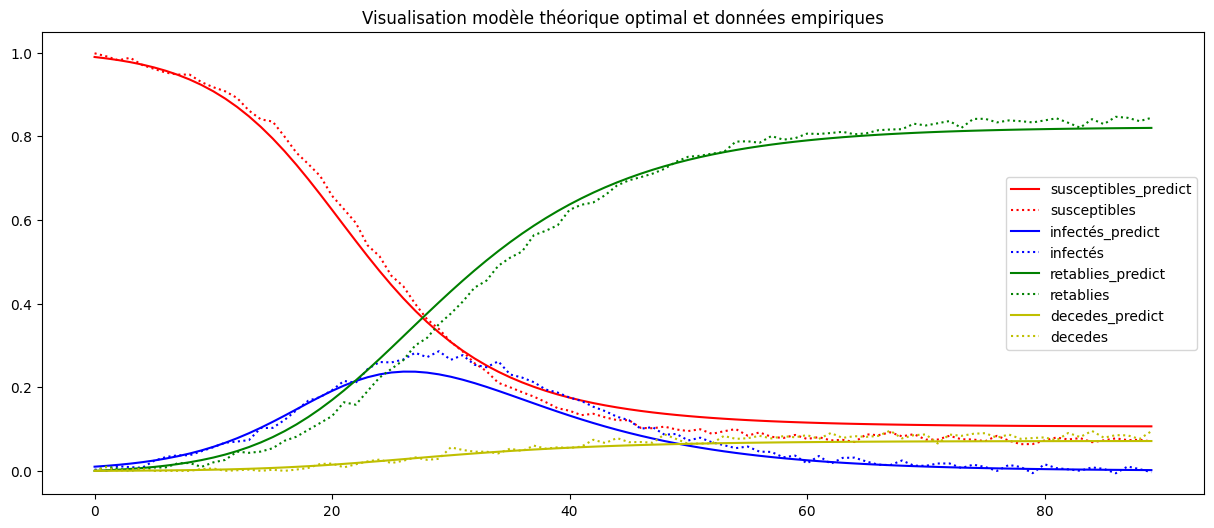

In [14]:
#4 Visualisation des la fonctions
def show_result(df, susceptibles,infectés,retablies,decedes, nb_jours, step):

	plt.figure(figsize=(15,6))
	time = np.arange(0, nb_jours , step)
	time = time[:: int(1/step)]
	
	plt.plot(time, susceptibles, "r-")
	plt.plot(time, df["Susceptibles"], "r:")

	plt.plot(time, infectés, "b-")
	plt.plot(time, df["Infectés"], "b:")

	plt.plot(time, retablies, "g-")
	plt.plot(time, df["Rétablis"], "g:")

	plt.plot(time, decedes, "y-")
	plt.plot(time, df["Décès"], "y:")

	plt.title("Visualisation modèle théorique optimal et données empiriques")
	plt.legend(["susceptibles_predict", "susceptibles","infectés_predict","infectés" ,  "retablies_predict", "retablies",  "decedes_predict", "decedes"])
	plt.show()


best_beta, best_gamma, best_mu, best_mse = grid_search(0.01, 90, population_df)

susceptibles,infectés,retablies,decedes = method_euler(best_beta, best_gamma, best_mu, 0.01, 90, 0.99, 0.01, 0, 0)


show_result(population_df, susceptibles[:-1],infectés[:-1],retablies[:-1],decedes[:-1], 90, 0.01)

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.

In [ ]:
#2

3.